# Decision Trees

## Import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree

## Set up

In [2]:
df = pd.read_csv('salaries.csv')
df.head()

,company,job,degree,salary_more_than_100k
0,TechCorp,Backend Developer,Masters,1
1,DataSolutions,Product Manager,Masters,0
2,TechCorp,Frontend Developer,Masters,1
3,InnoWare,Frontend Developer,Masters,1
4,DataSolutions,System Admin,Bachelors,1


### Designate inputs and target features

In [3]:
inputs = df.drop('salary_more_than_100k', axis=1)
target = df['salary_more_than_100k']

## Encode labels

In [4]:
company_le = LabelEncoder()
job_le = LabelEncoder()
degree_le = LabelEncoder()

In [5]:
inputs['company_n'] = company_le.fit_transform(inputs['company'])
inputs['job_n'] = job_le.fit_transform(inputs['job'])
inputs['degree_n'] = degree_le.fit_transform(inputs['degree'])

In [6]:
inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,TechCorp,Backend Developer,Masters,4,0,1
1,DataSolutions,Product Manager,Masters,1,5,1
2,TechCorp,Frontend Developer,Masters,4,3,1
3,InnoWare,Frontend Developer,Masters,2,3,1
4,DataSolutions,System Admin,Bachelors,1,8,0


### Drop columns with categorical values

In [7]:
unused_features = ['company', 'job', 'degree']
inputs_n = inputs.drop(unused_features, axis=1)


## Split the data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(inputs_n, target, test_size=0.25, random_state=42)

## Create model

In [9]:
model = tree.DecisionTreeClassifier()

## Train model

In [10]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

## Make a prediction

In [11]:
model.score(inputs_n, target)

0.8391261171797418

In [12]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0])

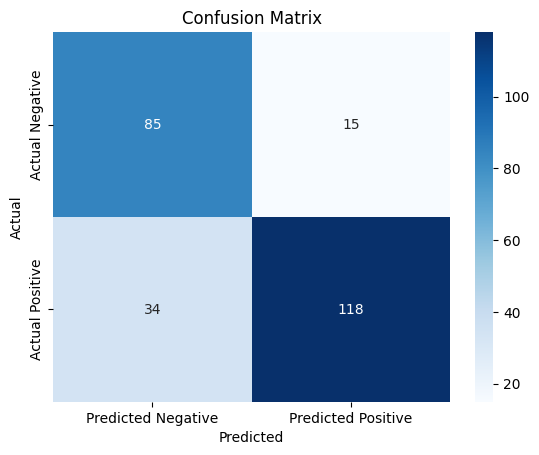

In [14]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
report = classification_report(y_test, y_pred)
print(report)